In [1]:
import numpy as np
import imageio as io
import scipy
import matplotlib.pyplot as plt

from scipy import stats
from skimage import color
from skimage import filters
from skimage.filters import sobel
from skimage.segmentation import watershed
from skimage import morphology

from os import listdir
from os.path import isfile, join

In [2]:
def normalize(matrix, start, end):
    return (matrix - matrix.min())/(matrix.max() - matrix.min()) * (end-start) + start

In [3]:
def load_rgb_visualize(img_path, min_v = 0, max_v = 255, plot = True):
    img_orig = io.imread(img_path)
    img_orig_gs = color.rgb2gray(img_orig)
    img_orig_gs = normalize(img_orig_gs, min_v, max_v).astype(np.uint8)
    
    if plot:
        plt.figure(figsize=(20, 10))
        plt.subplot(121)
        plt.imshow(img_orig)
        plt.subplot(122)
        plt.imshow(img_orig_gs, cmap='gray')
    
    return img_orig_gs, img_orig

In [4]:
def apply_otsu(img_orig_gs, bins = 256, min_v = 0, max_v = 256):
    
    # 1. Compute histogram
    hist, _ = np.histogram(img_orig_gs, bins=256, range=(min_v,max_v))

    # 2. Compute threshold
    ths = filters.threshold_otsu(img_orig_gs)
    img_ths = img_orig_gs < ths
    hist_ths, _ = np.histogram(img_ths, bins=256, range=(min_v,max_v))
    
    return img_orig_gs, hist, img_ths, hist_ths

In [5]:
def apply_watershed(img_orig_gs, seeds_num = 8, bins = 256, min_v = 0, max_v = 256):
    random_seeds = np.zeros(img_orig_gs.shape)

    indices = np.random.randint(0, img_orig_gs.shape, [seeds_num, 2])


    random_seeds[indices[:, 0], indices[:, 1]] = img_orig_gs[indices[:, 0], indices[:, 1]]

    random_seeds = morphology.dilation(random_seeds, morphology.disk(4)).astype(np.uint8) 
    elevation_map = sobel(img_orig_gs)
    segmentation = watershed(elevation_map, random_seeds)
    # segmentation = normalize(segmentation, 0, 255).astype(np.uint8)
    # print(segmentation)

    elev_ths, _ = np.histogram(elevation_map, bins=bins, range=(min_v,max_v))
    seg_ths, _ = np.histogram(segmentation, bins=bins, range=(min_v,max_v))
    rand_ths, _ = np.histogram(random_seeds, bins=bins, range=(min_v,max_v))
    
    return img_orig_gs, random_seeds, elevation_map, segmentation

In [54]:
def comparison_pipeleline(path= 'fire_seg_test/', plot = True):

    files = [f for f in listdir(path) if isfile(join(path, f))]
    result = {'orig': list(), 'otsu': list(), 'watershed': list()}
    
    for file in files:
        img_processed, orig = load_rgb_visualize(img_path=join(path, file), plot = False)
        _, _, img_ths, _ =  apply_otsu(img_processed)
        _,_,_,segmentation =  apply_watershed(img_processed)
        
        result['orig'].append(orig)
        result['otsu'].append(img_ths)
        result['watershed'].append(segmentation)
        
        
        if plot:
    
            plt.figure(figsize=(20, 10))
            plt.subplot(121).axis('off')
            plt.imshow(img_ths, cmap='gray')
            plt.title('OTSU')
                      
            plt.subplot(122).axis('off')
            plt.imshow(img_processed, cmap='gray', )
            plt.imshow(segmentation, cmap=plt.cm.nipy_spectral, alpha=0.4)
            plt.title('Watershed')
        
    return result
             

In [36]:
def visualize_otsu(img_orig_gs, hist, img_ths, hist_ths):
    plt.figure(figsize=(20, 12))
    plt.subplot(221); plt.imshow(img_orig_gs, cmap='gray')
    plt.subplot(222); plt.bar(np.arange(0,256), hist)

    plt.subplot(223); plt.imshow(img_ths, cmap='gray')
    plt.subplot(224); plt.bar(np.arange(0,256), hist_ths)

In [22]:
def visualize_watershed(img_orig_gs, random_seeds, elevation_map, segmentation):

    fig, axes = plt.subplots(2,2, figsize=(20, 12), sharex=True, sharey=True)
    ax = axes.ravel()
    axes[0, 0].imshow(img_orig_gs, cmap='gray'); axes[0, 0].axis('off'); axes[0,0].set_title('Image')
    # axes[0, 1].bar(np.arange(0,256), hist)

    axes[0, 1].imshow(random_seeds, cmap='gray'); axes[0, 1].axis('off'); axes[0,1].set_title('Random Seeds')
    # axes[1, 1].bar(np.arange(0,256), hist)

    axes[1, 0].imshow(elevation_map, cmap='gray'); axes[1, 0].axis('off'); axes[1,0].set_title('Elevation Map')
    # axes[2, 1].bar(np.arange(0,256), elev_ths)

    axes[1, 1].imshow(img_orig_gs, cmap='gray'); axes[1, 1].axis('off'); axes[1,1].set_title('Result')
    axes[1, 1].imshow(segmentation, cmap=plt.cm.nipy_spectral, alpha=0.4)

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


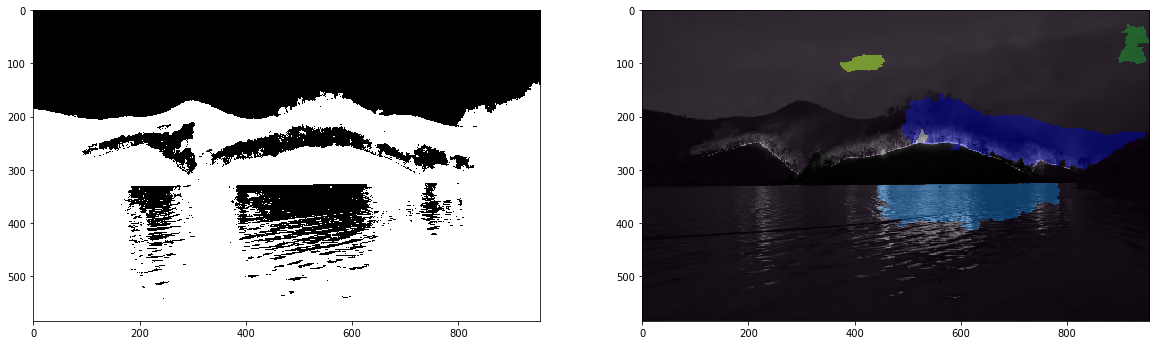

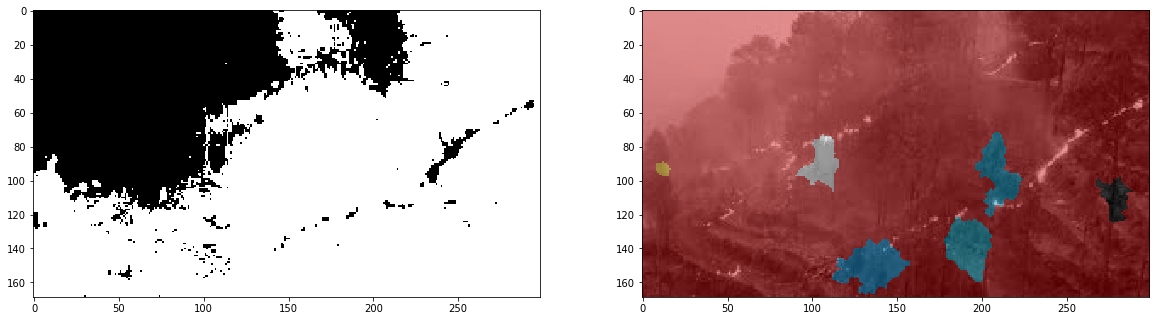

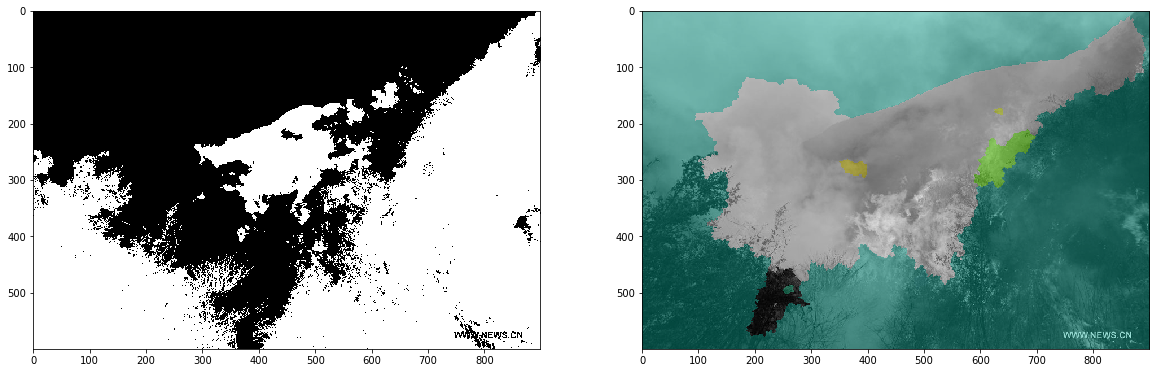

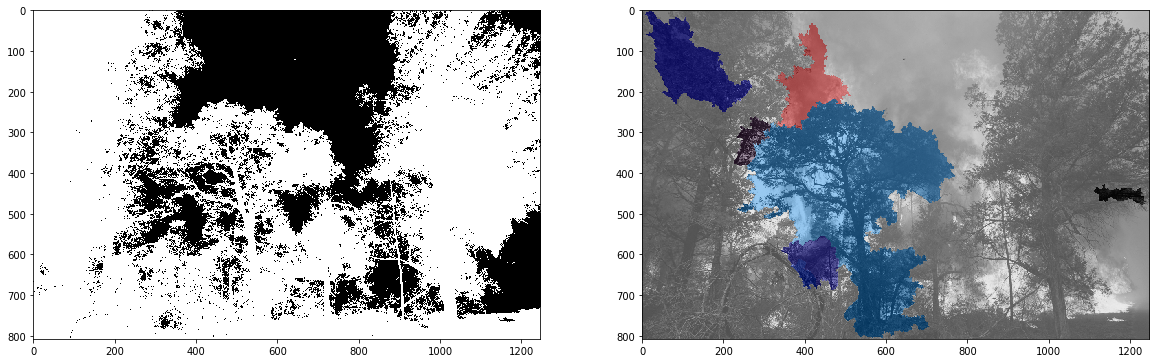

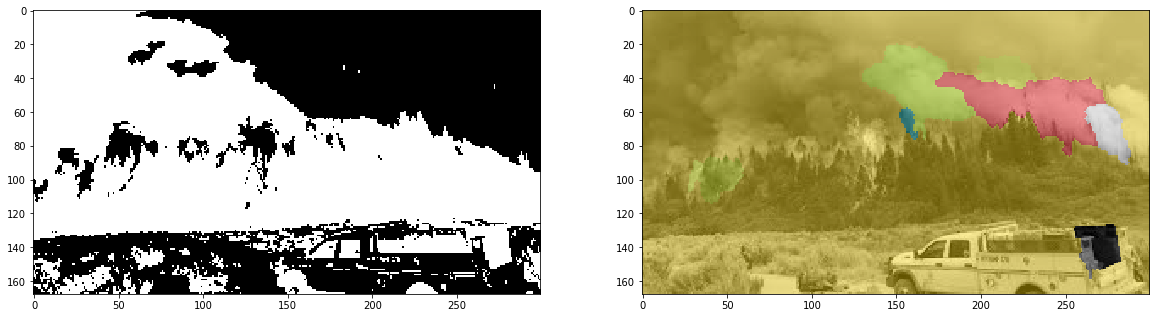

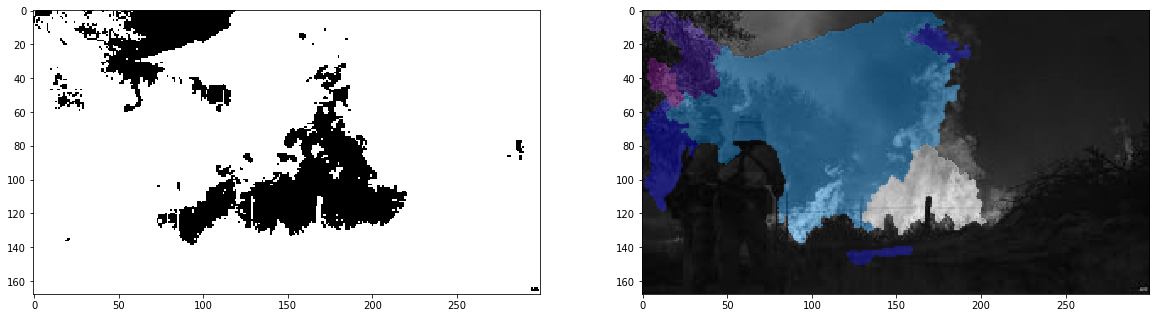

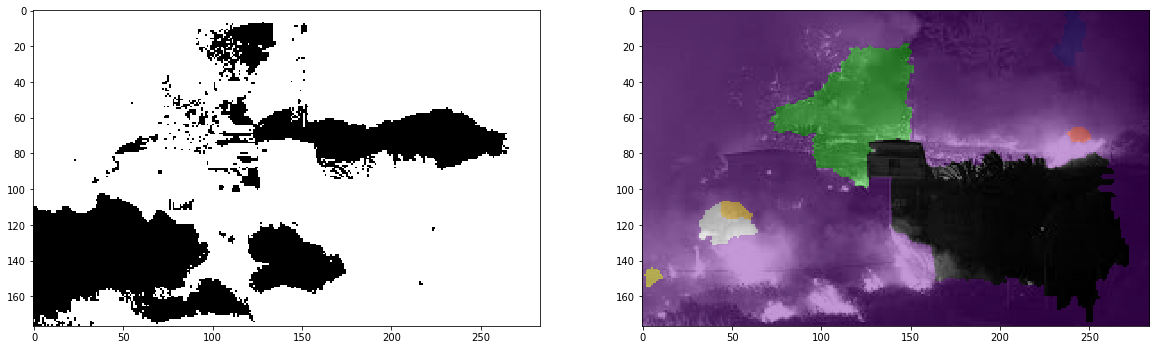

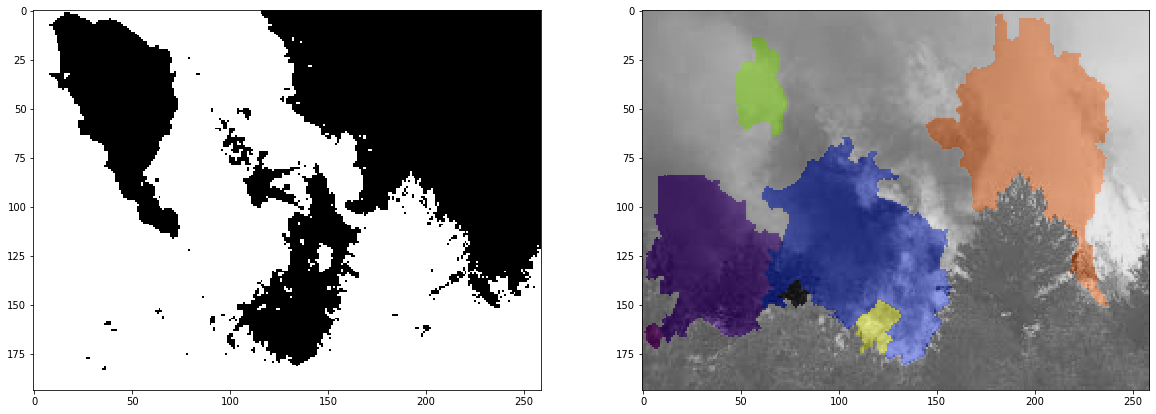

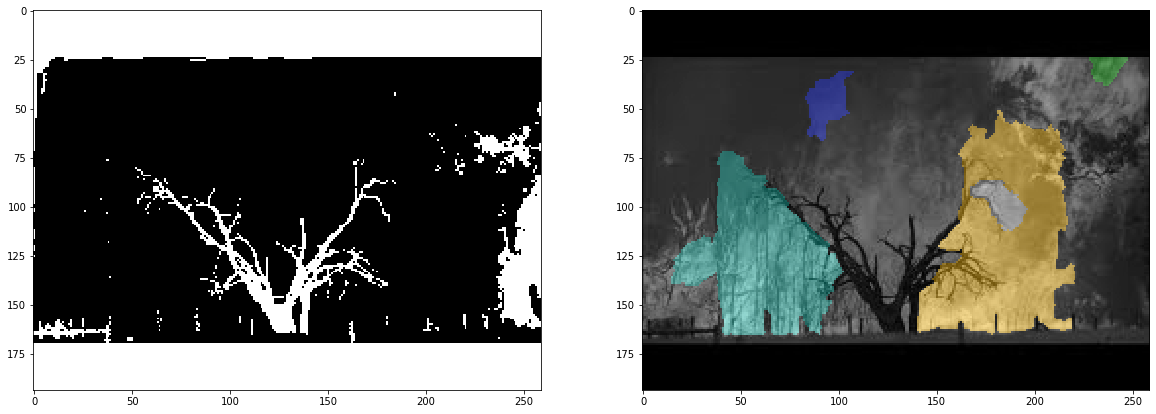

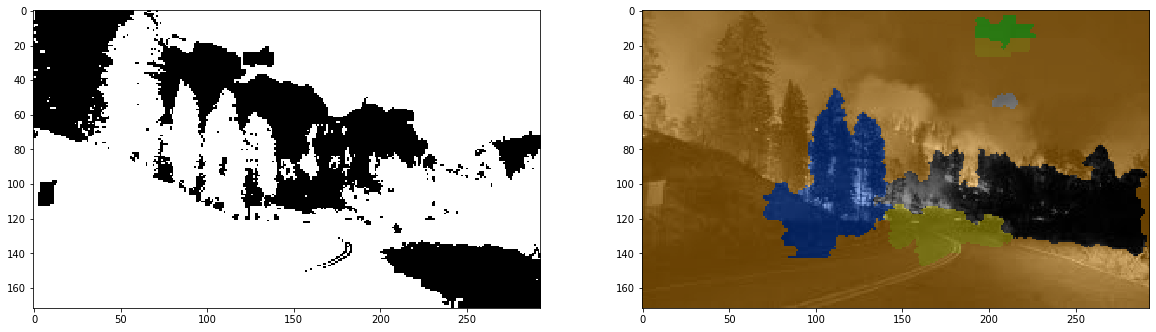

In [19]:
result = comparison_pipeleline()

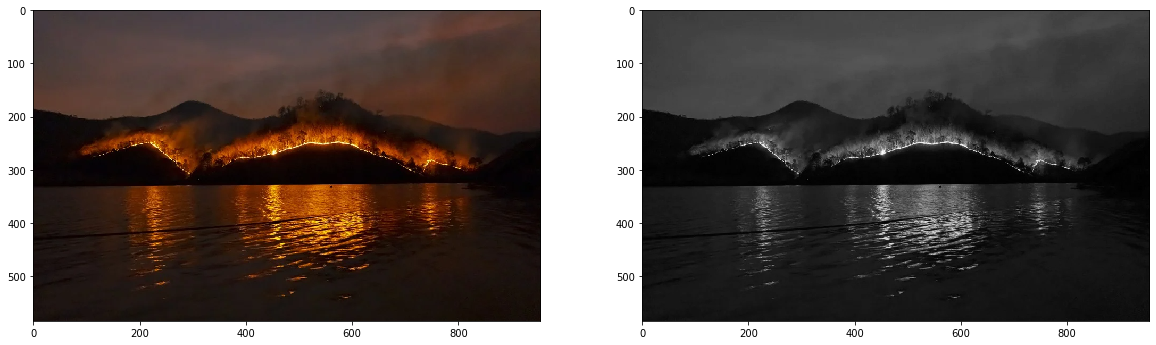

In [47]:
img_test, _ = load_rgb_visualize('fire_seg_test/1.png')

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


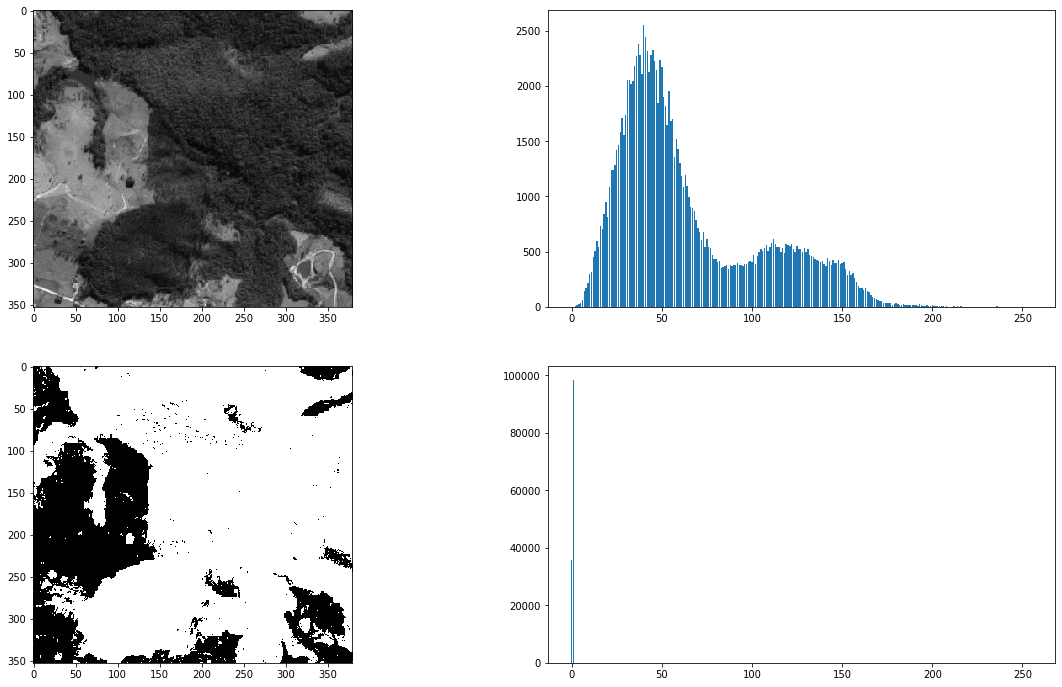

In [21]:
reference_name = 'floresta.jpeg'

img_orig = ref_image = io.imread(reference_name)
img_orig_gs = color.rgb2gray(img_orig)
img_orig_gs = normalize(img_orig_gs, 0, 255).astype(np.uint8)

img_orig_gs_2, hist, img_ths, hist_ths = apply_otsu(img_orig_gs)
visualize_otsu(img_orig_gs_2, hist, img_ths, hist_ths)

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


<BarContainer object of 256 artists>

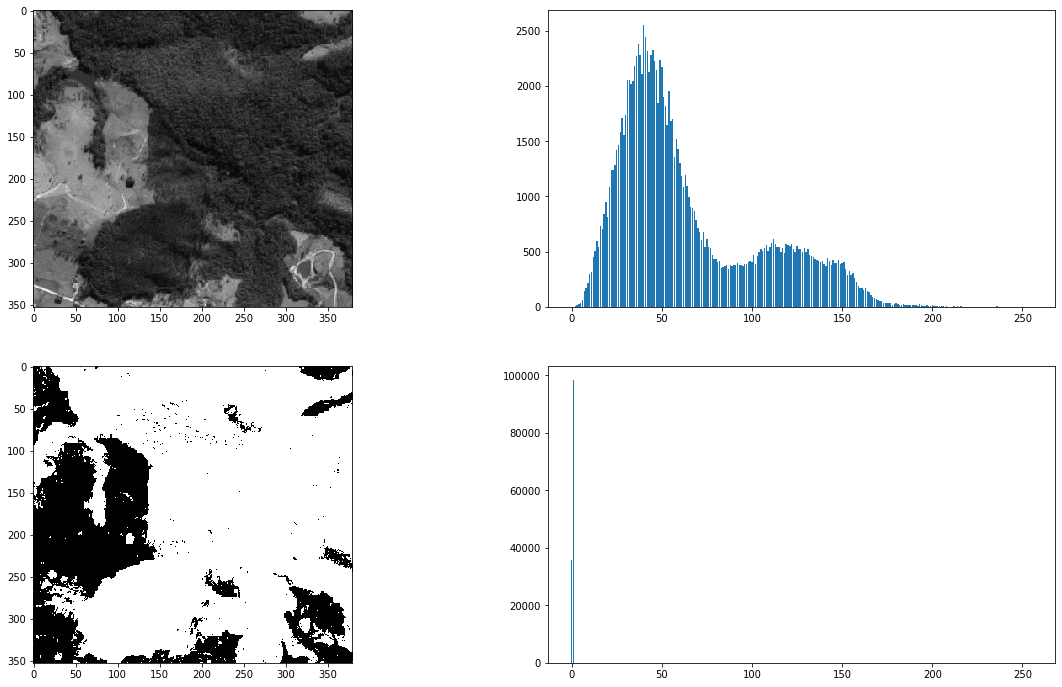

In [4]:

# 1. Compute histogram
hist, _ = np.histogram(img_orig_gs, bins=256, range=(0,256))

# 2. Compute threshold
ths = filters.threshold_otsu(img_orig_gs)
img_ths = img_orig_gs < ths
hist_ths, _ = np.histogram(img_ths, bins=256, range=(0,256))


plt.figure(figsize=(20, 12))
plt.subplot(221); plt.imshow(img_orig_gs, cmap='gray')
plt.subplot(222); plt.bar(np.arange(0,256), hist)

plt.subplot(223); plt.imshow(img_ths, cmap='gray')
plt.subplot(224); plt.bar(np.arange(0,256), hist_ths)


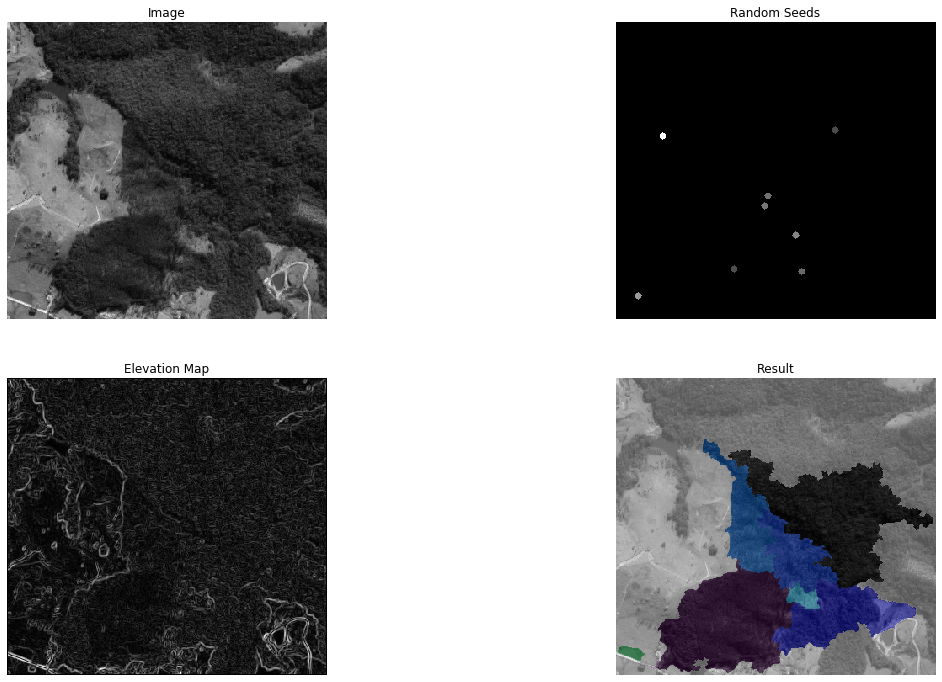

In [23]:
img_orig_gs, random_seeds, elevation_map, segmentation =  apply_watershed(img_orig_gs)

visualize_watershed(img_orig_gs, random_seeds, elevation_map, segmentation)

# Testing

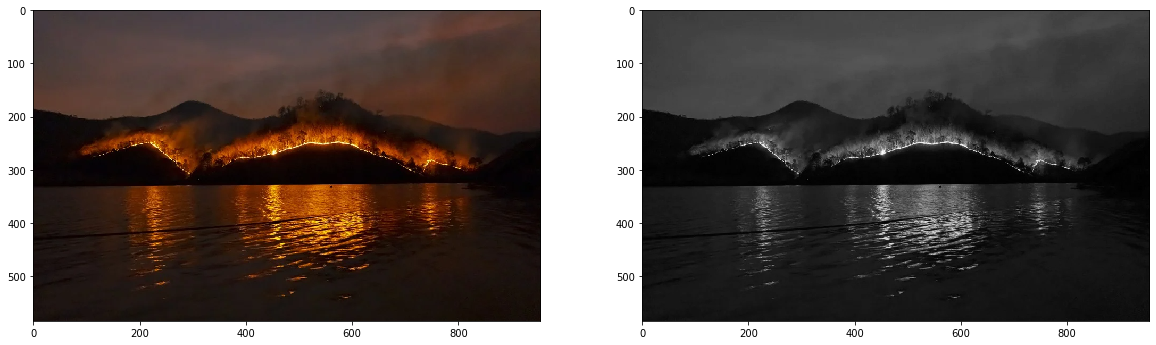

In [25]:
#load and converting and visualize funcion
img_test, _ = load_rgb_visualize('fire_seg_test/1.png')

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


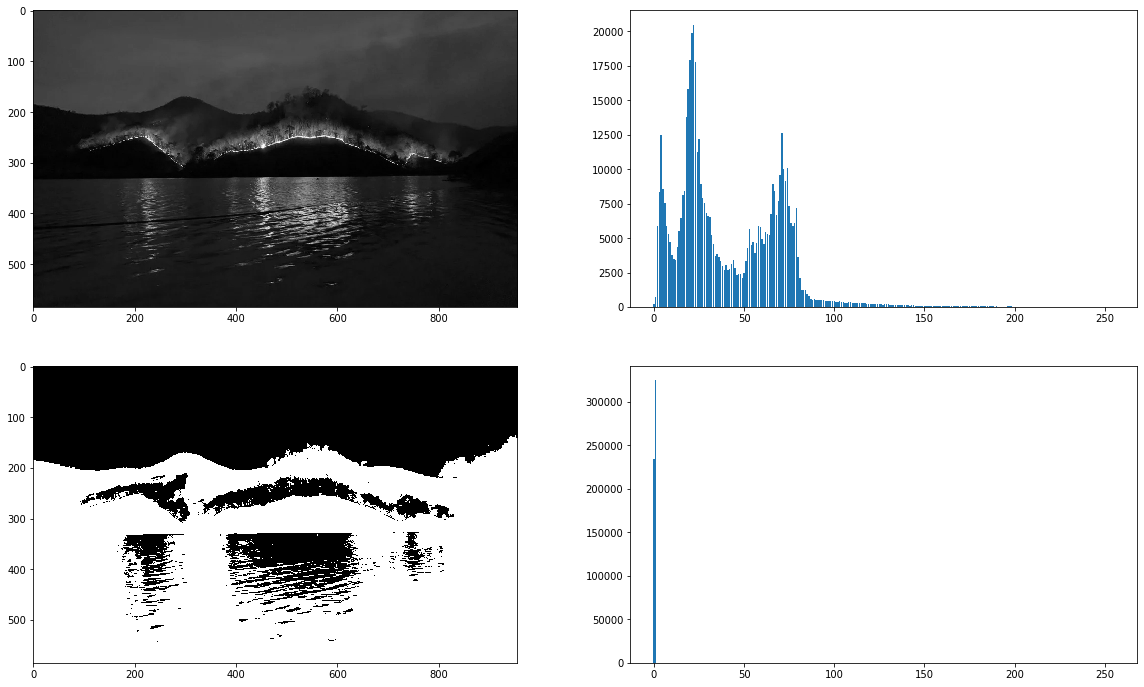

In [26]:
#apply otsu
img_orig_gs, hist, img_ths, hist_ths = apply_otsu(img_test)

#visualize layout for otsu
visualize_otsu(img_orig_gs, hist, img_ths, hist_ths)

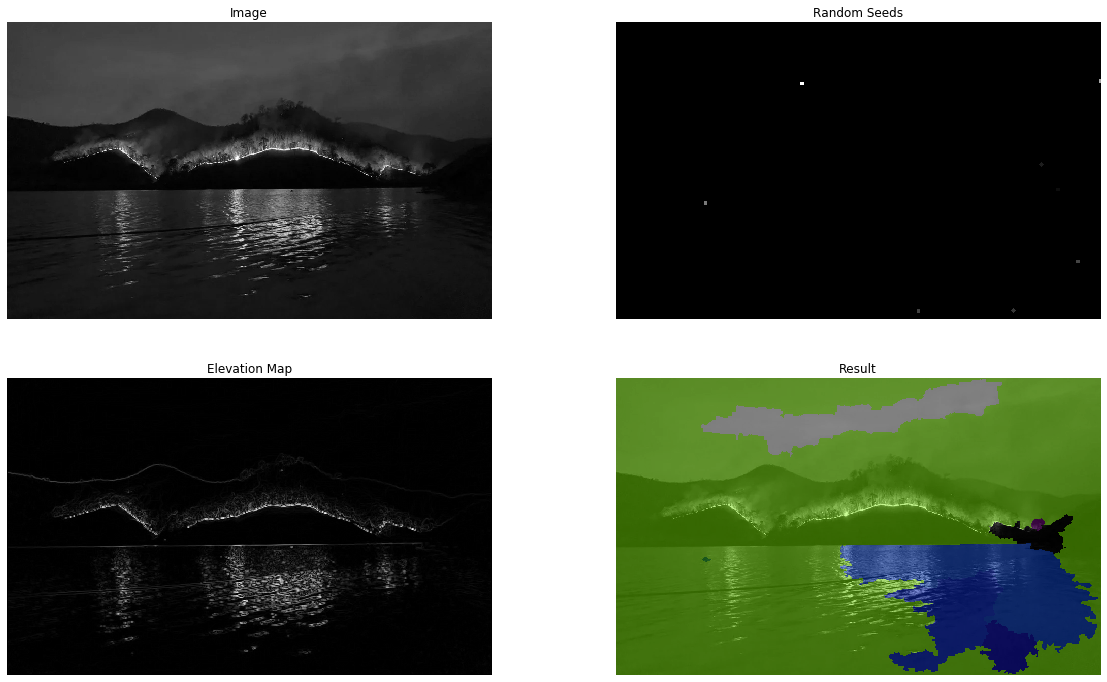

In [27]:
#applying watershed
img_orig_gs, random_seeds, elevation_map, segmentation =  apply_watershed(img_orig_gs)

#visualization layout for watershed
visualize_watershed(img_orig_gs, random_seeds, elevation_map, segmentation)

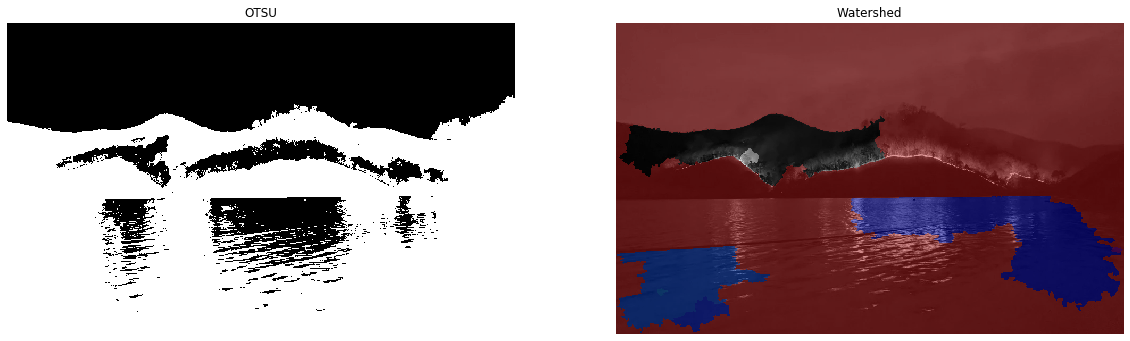

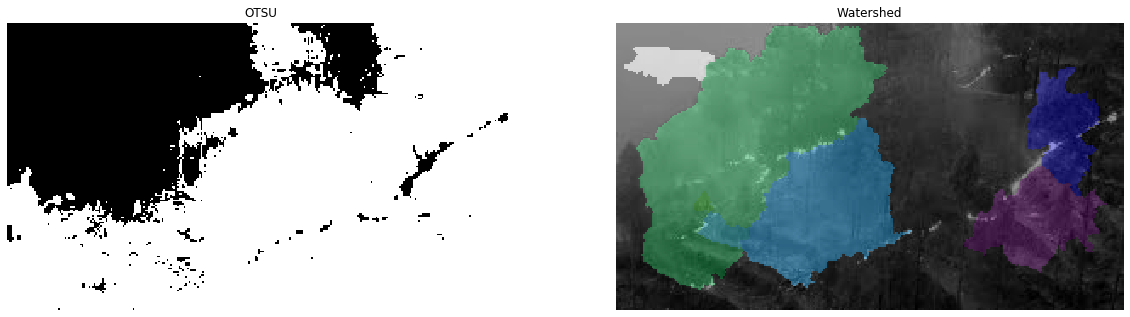

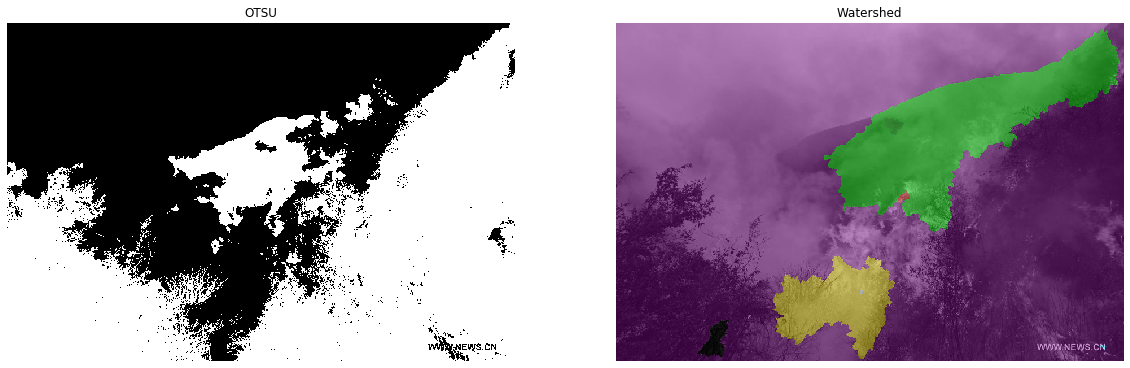

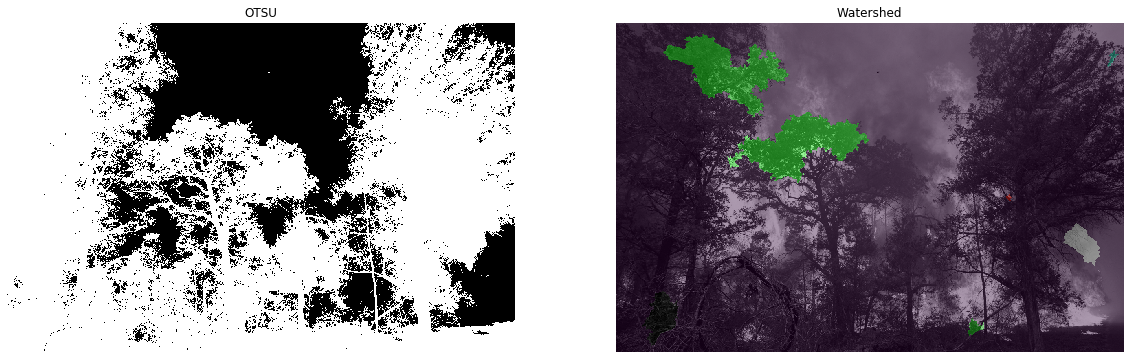

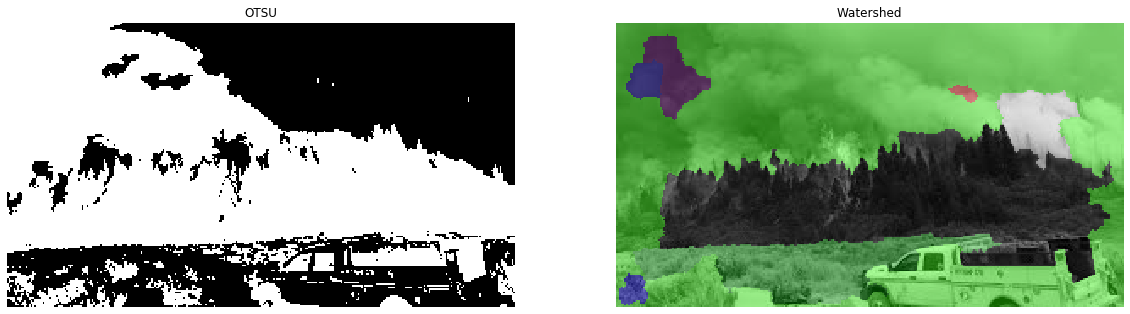

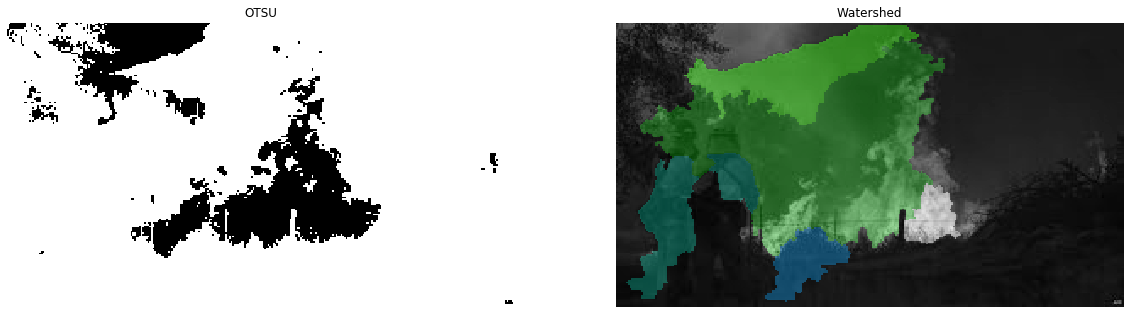

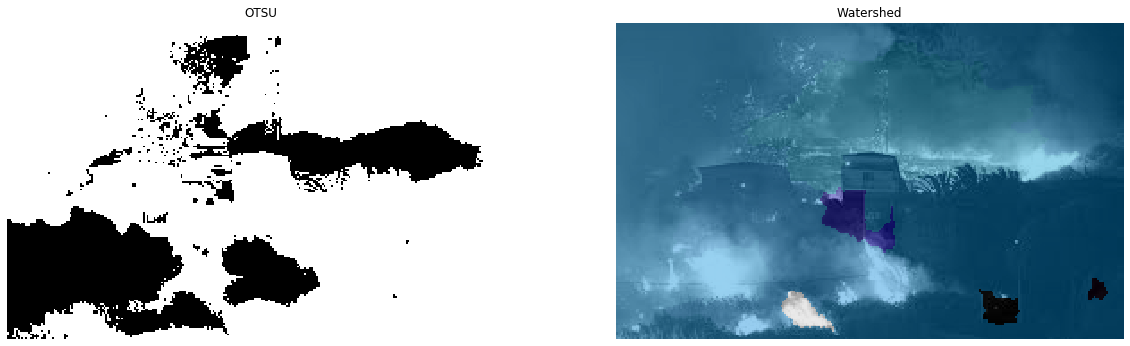

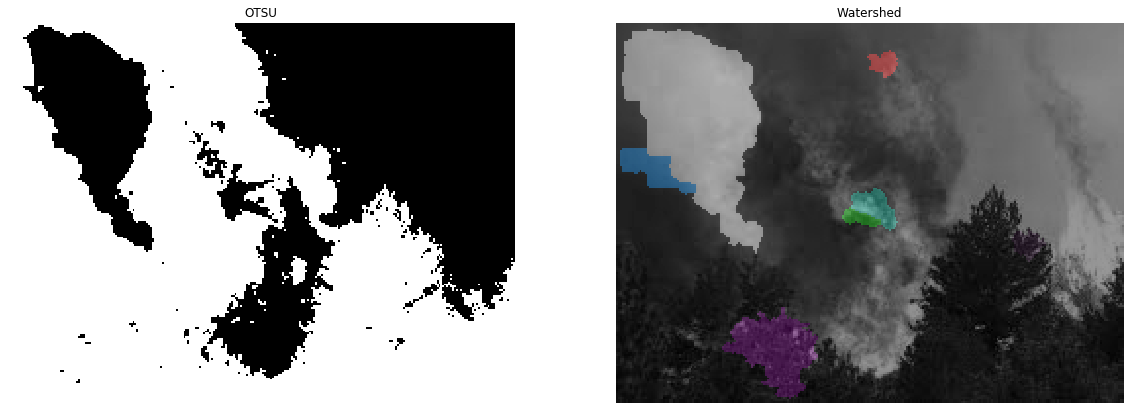

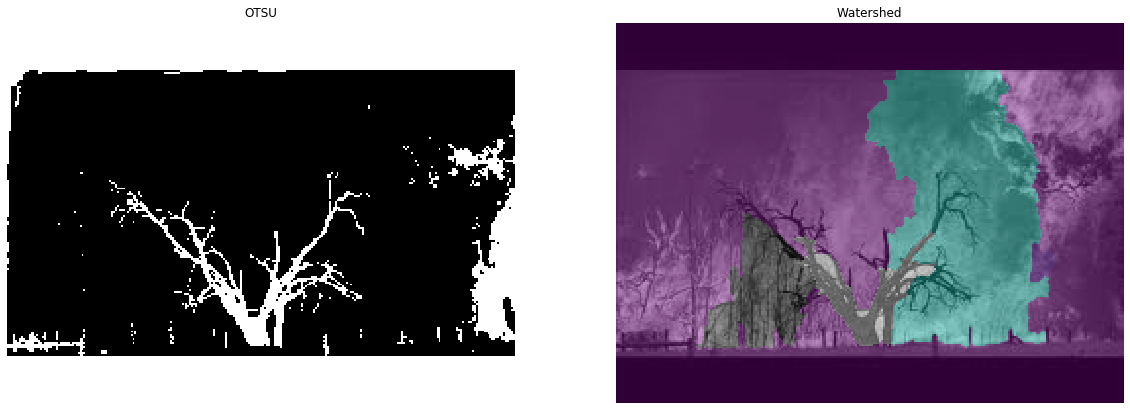

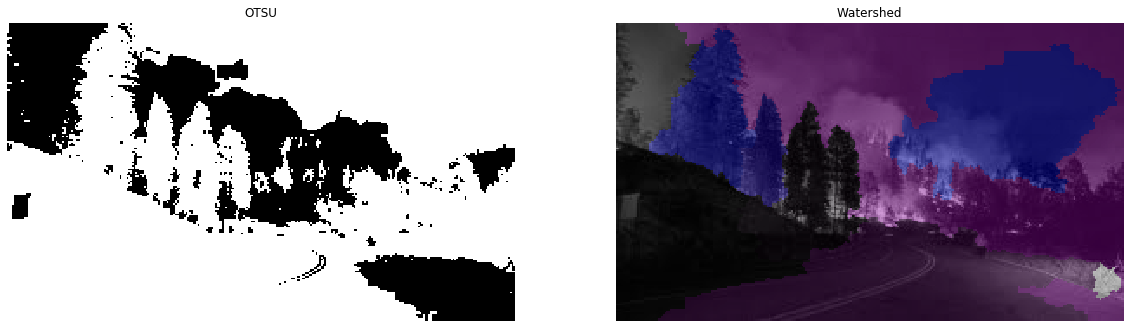

In [55]:
#coparing otsu method against watershed method
result = comparison_pipeleline()